# The Youth Tobacco Survey
In this project I investigated  Youth Tobacco usage by US States from 1999 to 2017 as reported to CDC. The final report grades US States by how successful are their efforts to reduce various types of  Youth Tobacco usage over time.  
In this project I concentrated more on using SQL for data processing while Python is primarily used for plots.


## Data
For this analysis I used a publicly available dataset. <br>
The dataset could be downloaded from:<br>
* __[Youth Tobacco Survey](https://catalog.data.gov/dataset/youth-tobacco-survey-yts-data
)__


## Data Preprocessing
Before I could start any analysis I have to perform preprocessing of the dataset so the dataset could be utilized in Python analysis.<br>
**Some of the preprocessing of data is done in SQL.**<br><br>
The following preprocessing steps were employed:<br>
* I removed unnecessary variables not used in this project.
* I filter records so only high school students regardless of gender are considered.
* Additional filtering included only tobacco users and excluded Smokeless Tobacco, etc..


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm
df = pd.read_csv("..\\DataSets\\Tabaco\\Youth_Tobacco_Survey.csv")
colToKeep = ['YEAR', 'LocationAbbr', 'TopicDesc','MeasureDesc', 'Response', 'Data_Value', 'Education','Gender']
dfC =  df[colToKeep]
# filtering:
dfFilter = dfC.loc[(dfC['TopicDesc'] == 'Cigarette Use (Youth)')\
                   & (dfC['Gender'] == 'Overall')\
                   & (dfC['Education'] == 'High School')\
                   & (dfC['Response'] == 'Current')\
                       ]    
# save to file for sql use:
#dfFilter.to_csv('..\\DataSets\\Tabaco\\Youth_Tobacco_SurveyShort.csv', index=False)


##### Dataset of tobacco users by state (first 5 rows)

In [2]:
dfFilter.head(5)

,YEAR,LocationAbbr,TopicDesc,MeasureDesc,Response,Data_Value,Education,Gender
66,2003,ND,Cigarette Use (Youth),Smoking Status,Current,26.3,High School,Overall
75,2005,UT,Cigarette Use (Youth),Smoking Status,Current,10.3,High School,Overall
92,2015,HI,Cigarette Use (Youth),Smoking Status,Current,7.4,High School,Overall
95,2002,MS,Cigarette Use (Youth),Smoking Status,Current,23.3,High School,Overall
249,2013,HI,Cigarette Use (Youth),Smoking Status,Current,5.8,High School,Overall


## Analysis
### Trend over time
To start my analysis I showed a tread of high school tobacco users from 1999 till 2017.<br>
It was little surprising to notice that in just over 20 years ago over 32% of students were current smokers.<br>


<IPython.core.display.Javascript object>


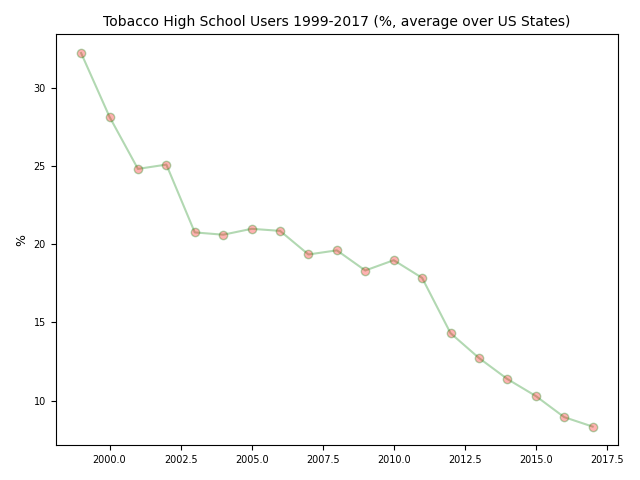

In [16]:
dfResultsDesc = dfFilter.groupby("YEAR").agg({"Data_Value":(np.nanmean)}).sort_values(by=['YEAR'], ascending=True).reset_index()
      
plt.figure()
plt.plot(dfResultsDesc.YEAR, dfResultsDesc['Data_Value'],  color='g', alpha = 0.3, label = 'White Sox',  marker='o', mfc='red')
ax = plt.gca()
ax.tick_params(axis="y", labelsize=7)
ax.tick_params(axis="x", labelsize=7)
plt.title('Tobacco High School Users 1999-2017 (%, average over US States)', fontsize='10')
plt.ylabel('%', fontsize='9')
plt.tight_layout()
plt.show()

### States Distribution
The next graph shows distribution % of active youth tobacco users by state.<br>
* It is clear that the % of smokers decreased dramatically between 1999 and the most recent year for a state.
* It is little surprising that there are still states with high % of youth smokers (around 25%)<br>
__Note: SQL processing code is in data folder__


<IPython.core.display.Javascript object>


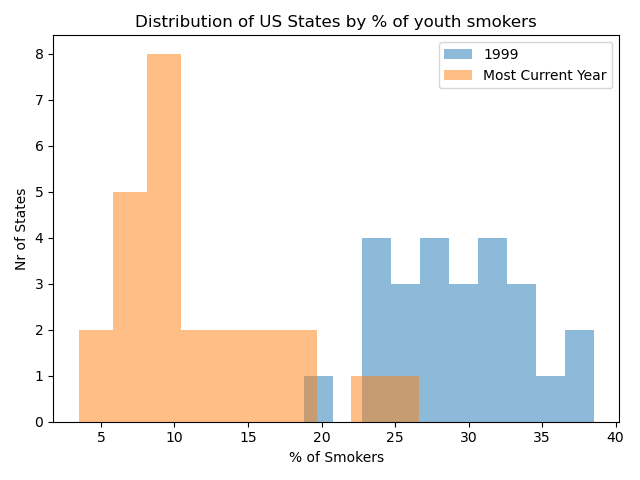

In [17]:
dfSQL = pd.read_csv("..\\DataSets\\Tabaco\\SQLYouth_Short.csv")
plt.figure()
plt.hist(dfSQL.Data_Value[dfSQL.maxORmin == -1], bins=10, alpha=0.5, label='1999')
plt.hist(dfSQL.Data_Value[dfSQL.maxORmin == 1], bins=10, alpha=0.5, label='Most Current Year')
plt.legend(loc='upper right')
plt.xlabel('% of Smokers')
plt.ylabel('Nr of States')
plt.title('Distribution of US States by % of youth smokers')
plt.tight_layout()
plt.show()
